In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import math

import operator as opr

# Set variable TR1902 to open Theodore Roosevelt's 1902 State of the Union address.

In [2]:
TR1902= open(r'Speeches\TR_December_2_1902.txt','r').read().lower()

# Set Stopwords

In [3]:
STOPWORDS= set(stopwords.words('english'))

# Tokenize TR1902 and remove Stopwords, punctuation, and numbers

In [4]:
TR1902_Tok= word_tokenize(TR1902)

In [5]:
TR1902_NoStop= [i for i in TR1902_Tok if i not in STOPWORDS]

In [6]:
TR1902_sort= sorted(list(TR1902_NoStop))

In [7]:
TR1902_punc= []
for i in TR1902_sort[0:776]:
    if i not in TR1902_punc:
        TR1902_punc.append(i)
print(TR1902_punc)

['$', "''", "'s", '(', ')', ',', '--', '.', '1', '10,216,853.87', '10,748', '11,650', '121,848,047.26', '1860', '1875', '1879', '1893', '1901', '1901.', '1902', '20', '30', '4', '8,518,067.rural', ':', ';', '[', ']', '``']


# Bag of words

In [8]:
words= []
for i in TR1902_sort:
    if i not in words:
        if i not in TR1902_punc:
            words.append(i)

In [9]:
count= [0 for i in range(len(words))]

for i in TR1902_sort:
    if i in words:
        count[words.index(i)]= count[words.index(i)] + 1

In [10]:
count_mean= sum(count)/len(count)

count_sort= sorted(list(count))
count_median= [count_sort[int(len(count_sort)/2-.5)],count_sort[int(len(count_sort)/2+.5)]]

In [11]:
BOW= list(zip(words,count))

# Look into most common words

In [12]:
tops= [BOW[i] for i in range(0,len(BOW)) if BOW[i][1] >= 4]

tops_word= [tops[i][0] for i in range(0,len(tops))]
tops_count= [tops[i][1] for i in range(0,len(tops))]
tops_count_RA= np.asarray(tops_count)

In [13]:
count= [i[1] for i in tops]

count_mean= sum(count)/len(count)

count_sort= sorted(list(count))
count_median= [count_sort[int(len(count_sort)/2-.5)],count_sort[int(len(count_sort)/2+.5)]]

print('Mean: ',count_mean,'\n')
print('Median= ',count_median,'\n')
print('Max: ',max(count),'\n')
print('Min: ', min(count))

Mean:  7.5477031802120145 

Median=  [6, 6] 

Max:  36 

Min:  4


# Determine sections of speech
Use concentrations of words to determine themes or subjects within certain sections of the speech.
"Alaska" (n=6) is a good place to start.

In [14]:
indices= [i for i in range(0,len(TR1902_NoStop)) if TR1902_NoStop[i]=="alaska"]

In [15]:
print(np.mean(indices))

indices_stdev= np.std(indices)
print(indices_stdev)

4539.166666666667
57.54828890206516



Now to try a more commonly used word. "Possible" (n= 14), is a good example.


In [16]:
indices= [i for i in range(0,len(TR1902_NoStop)) if TR1902_NoStop[i]=="possible"]

In [17]:
print(np.mean(indices))

indices_stdev= np.std(indices)
print(indices_stdev)

2758.4285714285716
1453.3862289880983



It's apparent that "possible" is much less of an indicator as to the subject of a section (stdev= 1453.39) than "Alaska" (stdev= 57.55).


Now to get indices for all words in our NoStop Tokens.

In [18]:
indices= []
for j in range(0,len(tops)):
    store= []
    for i in range(0,len(TR1902_NoStop)):
        if TR1902_NoStop[i] == tops[j][0]:
            store.append(i)
    indices.append(store)

Now that we have the indices, we can measure each words proximity to itself using the Standard Deviation of the indices.

In [19]:
indices_stdev= [np.std(i) for i in indices]
indices_stdev_RA= np.asarray(indices_stdev)

To keep everything together, we'll add all of the numbers together in a list and then add this "num_list" to a dictionary with the key being the affiliated term

In [20]:
num_list= list(zip(tops_count,indices_stdev,indices))

indices_dict= dict(zip(tops_word,num_list))

# Plot the findings

The first plot is frequency to proximity of words.

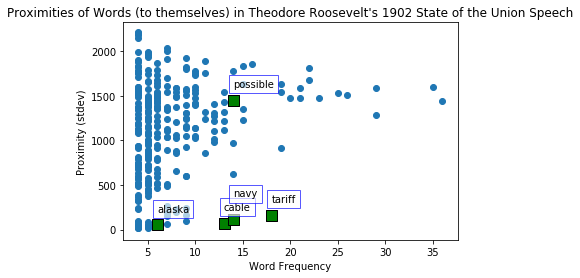

In [21]:
plt.title("Proximities of Words (to themselves) in Theodore Roosevelt's 1902 State of the Union Speech")
plt.xlabel("Word Frequency")
plt.ylabel("Proximity (stdev)")

t= plt.text(6,200,"alaska",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(14,1600,"possible",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(18,310,"tariff",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(13,220,"cable",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))
t= plt.text(14,370,"navy",fontsize='10')
t.set_bbox(dict(facecolor='white',alpha=.65,edgecolor='blue'))

plt.scatter(tops_count_RA,indices_stdev_RA)
plt.scatter(6,57.54828890206516,c= 'g',s= 121,marker= 's',edgecolors= 'k')
plt.scatter(14,1453.3862289880983,c='g',s=121,marker='s',edgecolors='k')
plt.scatter(18,159.60015625475813,c='g',s=121,marker='s',edgecolors='k')
plt.scatter(13,73.575867538369323,c='g',s=121,marker='s',edgecolors='k')
plt.scatter(14,122.29672847594233,c='g',s=121,marker='s',edgecolors='k')

plt.show()

Here we can see some areas stand out more than others. "Possible" is at the top of the graph, indicating this term is not found close to other "possible"s in the text. "Alaska","cable","navy", and "tariff" stand out in the bottom, indicating these terms are each used in the same sections of the text.

Cherry-picking some of the more significant terms from the chart above (those used more than 4 times and with a standard deviation of less than 300). This will essentially zoom in on the more interesting words that may indicate a section of the speech.

In [22]:
section_words= []
for i in range(0,len(num_list)):
    if num_list[i][0] > 4:
        if num_list[i][1] <= 300:
            section_words.append([tops_word[i],num_list[i][0],num_list[i][1]])

In [23]:
section_count_RA= np.asarray([section_words[i][1] for i in range(0,len(section_words))])
section_stdev_RA= np.asarray([section_words[i][2] for i in range(0,len(section_words))])

Graphing the cherry-picked terms. It's a little messy, but the words of interest (high frequency and low st dev) are very visible.

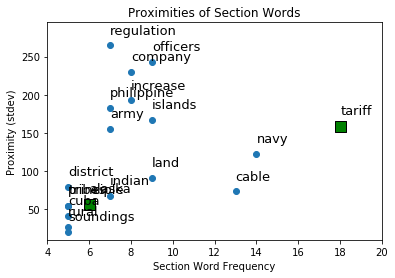

In [48]:
plt.title("Proximities of Section Words")
plt.xlabel("Section Word Frequency")
plt.ylabel("Proximity (stdev)")

for i in range(0,len(section_words)):
    plt.text(section_words[i][1],int(math.ceil(section_words[i][2]+15)),section_words[i][0],fontsize='13')

plt.scatter(section_count_RA,section_stdev_RA)
plt.scatter(6,57.54828890206516,c= 'g',s= 121,marker= 's',edgecolors= 'k')
plt.scatter(18,159.60015625475813,c='g',s=121,marker='s',edgecolors='k')

# plt.ylim(0,300)
plt.ylim(min(section_stdev_RA)-10,max(section_stdev_RA)+30)
plt.xlim(min(section_count_RA)-1,max(section_count_RA)+2)
# plt.xticks(np.arange(min(section_count_RA)-1,max(section_count_RA)+2,5))

plt.savefig("images\TR1902_Section_Words.png")
plt.show()

# Analysis

"Tariff", "navy", and "cable" are words that particularly stand out. Each of these words has a high frequency and are relatively close together in the speech.

A closer look is needed, but at first glance "tariff" appears to refer to Teddy's anti-trust agenda. Indeed, the 14 instances of "tariff" in the speech align with a paragraph or two, so this method appears to be identifying sections of this speech well.

Teddy's inherent affinity for a strong navy (he gained reknown among military elite for his publishing of 'The Naval War of 1812' in 1882) leads me to believe the term "navy" likely plays a role in several of his speeches, State of the Union and otherwise. Further analysis will need conducted to confirm this, however.

"Cable" seemed like an interesting word for 1902. When I looked this up in the text document, I found this is referring to the Trans-Pacific Cable, a telegraph cable intended to connect America to the Philippines (via Hawaii) and to China and Japan.
<a href=https://en.wikipedia.org/wiki/Commercial_Pacific_Cable_Company>Wikipedia page referring to TPC</a>

# Tokenizing by n-grams
A different approach to word frequencies and themes of TR's 1902 State of the Union address can be conducted using pairs or sets of words that commonly appear.

I will begin by checking for pairs of words that frequently occur together.

In [26]:
#gram2= [TR1902_Tok[i]+" "+TR1902_Tok[i+1] for i in range(0,len(TR1902_Tok)-1) if TR1902_Tok[i] not in TR1902_punc if TR1902_Tok[i+1] not in TR1902_punc]
gram2= [list([TR1902_Tok[i],TR1902_Tok[i+1]]) for i in range(0,len(TR1902_Tok)-1) if TR1902_Tok[i] not in TR1902_punc if TR1902_Tok[i+1] not in TR1902_punc]

In [27]:
gram2_words= []
for i in gram2:
    if i not in gram2_words:
        gram2_words.append(i)
            
gram2_count= [0 for i in range(len(gram2_words))]

for i in gram2:
    if i in gram2_words:
        gram2_count[gram2_words.index(i)]= gram2_count[gram2_words.index(i)] + 1

In [28]:
gram2_max= max(gram2_count)

gram2_min= min(gram2_count)

gram2_mean= sum(gram2_count)/len(gram2_count)

count_sort= sorted(list(count))
gram2_median= [count_sort[int(len(count_sort)/2-.5)],count_sort[int(len(count_sort)/2+.5)]]

In [29]:
print(gram2_max)
print(gram2_min)
print(gram2_mean)
print(gram2_median)

162
1
1.4032080515804373
[6, 6]


In [30]:
gram2_BOW= list(zip(gram2_words,gram2_count))

In [31]:
gram2_tops= [i for i in gram2_BOW if i[1] > 2 if i[0][0] not in STOPWORDS if i[0][1] not in STOPWORDS]

In [32]:
gram2_tops.sort(key=lambda x: int(x[1]),reverse=True)

In [33]:
type(gram2_tops)
for i in gram2_tops:
    print(i)

(['united', 'states'], 7)
(['philippine', 'islands'], 6)
(['industrial', 'development'], 4)
(['business', 'interests'], 4)
(['one', 'hundred'], 4)
(['every', 'effort'], 4)
(['interstate', 'business'], 3)
(['tariff', 'changes'], 3)
(['already', 'passed'], 3)
(['cable', 'company'], 3)
(['free-delivery', 'service'], 3)
(['rural', 'free-delivery'], 3)
